In [5]:
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11719 sha256=3efa3c04969970e6a0479f58c24f545de190ab76bf37dd9a98ca226a055d7568
  Stored in directory: c:\users\windows 10\appdata\local\pip\cache\wheels\ec\7e\00\ac334ebb21e9016a73bef195e9732606217c6894f96bd51e6f
Successfully built minisom


In [3]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
# Load dataset
iris = datasets.load_iris()
data = iris.data
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# Normalisasi data
data = data / data.max(axis=0)
data

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ],
       [0.6835443 , 0.88636364, 0.24637681, 0.16      ],
       [0.58227848, 0.77272727, 0.20289855, 0.12      ],
       [0.63291139, 0.77272727, 0.2173913 , 0.08      ],
       [0.55696203, 0.65909091, 0.20289855, 0.08      ],
       [0.62025316, 0.70454545, 0.2173913 , 0.04      ],
       [0.6835443 , 0.84090909, 0.2173913 , 0.08      ],
       [0.60759494, 0.77272727, 0.23188406, 0.08      ],
       [0.60759494, 0.68181818, 0.20289855, 0.04      ],
       [0.5443038 , 0.68181818, 0.15942029, 0.04      ],
       [0.73417722, 0.90909091, 0.17391304, 0.08      ],
       [0.72151899, 1.        , 0.2173913 , 0.16      ],
       [0.6835443 , 0.88636364, 0.1884058 , 0.16      ],
       [0.64556962, 0.79545455,

In [10]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

In [15]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

In [16]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

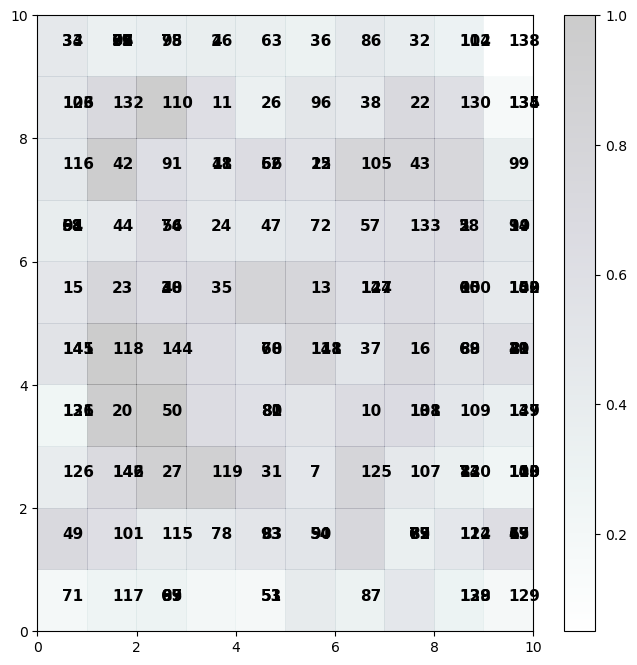

In [17]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()